## Luthur Challenge
### Ozzie Liu
Box Office Exploration and Visualization

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
## Load movies data
movies = pd.read_csv('2013_movies.txt')

### Challenge 1
Plot domestic total gross over time

In [89]:
movies.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22


In [25]:
## Change ReleaseDate column to DateTime format
movies['ReleaseDate'] = pd.to_datetime(movies['ReleaseDate'])

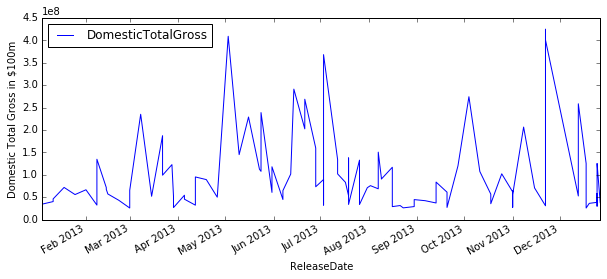

In [90]:
movies.plot(x = 'ReleaseDate', y='DomesticTotalGross', figsize=(10,4))
plt.ylabel('Domestic Total Gross in $100m')

### Challenge 2
Plot runtime vs. domestic total gross

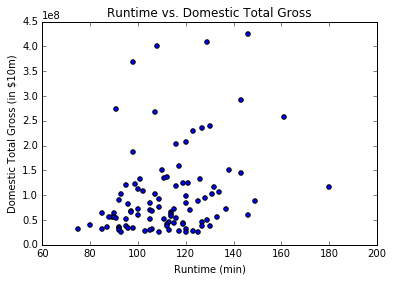

In [88]:
movies.plot(x = 'Runtime', y = 'DomesticTotalGross', kind = 'scatter')
plt.title('Runtime vs. Domestic Total Gross')
plt.xlabel('Runtime (min)')
plt.ylabel('Domestic Total Gross (in $10m)')

### Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [44]:
movies.groupby('Rating').mean().loc[:,['Runtime', 'DomesticTotalGross']]

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


### Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [60]:
ratings = pd.pivot_table(movies, values = 'DomesticTotalGross', index='ReleaseDate', columns = 'Rating')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000202A1BE0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000020851A20>], dtype=object)

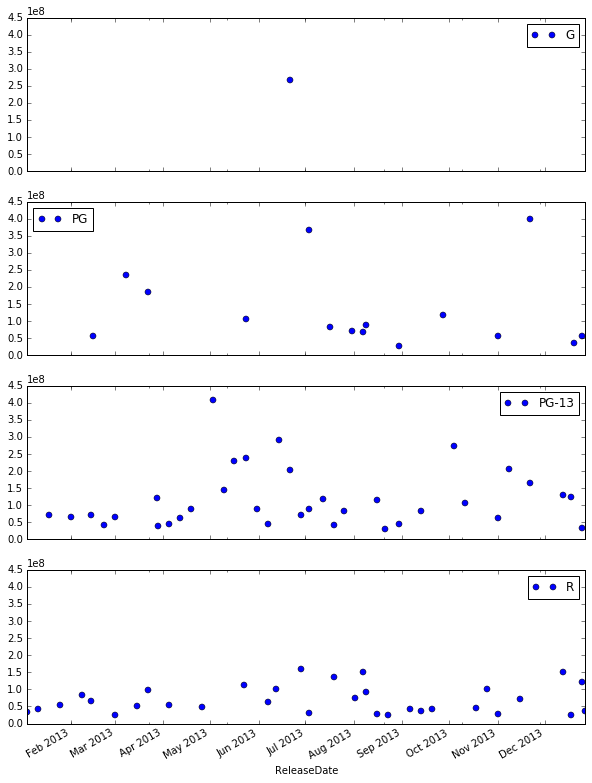

In [120]:
# ratings.interpolate().plot(subplots = True, figsize=(10,14), sharey = True)

ratings.plot(style= 'bo', subplots=True, figsize=(10,14), sharey = True)

### Challenge 5

What director in your dataset has the highest gross per movie?

In [91]:
director = movies.groupby('Director').mean()
director.sort_values(by='DomesticTotalGross').head(5)

,Budget,DomesticTotalGross,Runtime
Director,,,
Spike Jonze,23000000,25568251,120
Jon LucasScott Moore,13000000,25682380,93
Edgar Wright,20000000,26004851,109
Andrew Niccol,40000000,26627201,125
Ron Howard,38000000,26947624,123


Spike Jonze has the highest gross per movie

### Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

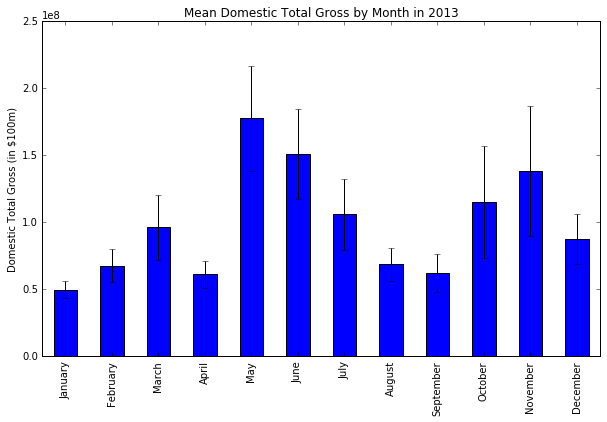

In [166]:
## Bin into months
binned = movies.groupby(pd.Grouper(key = 'ReleaseDate', freq='M'))['DomesticTotalGross']

## Find and calculate standard error from standard deviation
mean = binned.mean()
stdev = binned.std()
n = binned.count()
ME = stdev/np.sqrt(n)

## rename datetime to just month name
mean.index = [x.strftime('%B') for x in mean.index]
ME.index = [x.strftime('%B') for x in ME.index]

## Plot
mean.plot(yerr = ME, kind = 'bar', figsize = (10,6), style = 'y')        
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.ylabel('Domestic Total Gross (in $100m)')


The formula for stadard error is $$\frac{s}{\sqrt{n}}$$ where s is the standard deviation and n is the sample size.

The error overlayed on the plot above makes sense, as the gross profits vary higher and lower around the mean. With more movies in that month, the range of the error also increases.